In [1]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Necessary metadata
article_id = 14096681  # this is the unique identifier of the article on figshare

url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "figsharerainfall/"

In [3]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # this contains all the articles data, feel free to check it out
files = data["files"]             # this is just the data about the files, which is what we want
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [4]:
%%time
files_to_dl = ["data.zip"]  # feel free to add other files here
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: total: 8.58 s
Wall time: 1min 15s


In [5]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: total: 20.4 s
Wall time: 21.5 s


In [7]:
os.chdir("figsharerainfall")

In [7]:
%%time
## here we are using a normal python way for merging the data 
import pandas as pd

# files = glob.glob('figsharerainfall/*.csv')
extension = 'csv'
all_filenames = glob.glob('*.{}'.format(extension))
df = pd.concat((pd.read_csv(file, index_col=0)
                # .assign(model=re.findall(r'(?<=\/)[^_]+(?=_)', file))
                .assign(model=re.findall(r'^[^_]+(?=_)', file)[0])
                for file in all_filenames)
              )

# files = glob.glob('figsharerainfall/*.csv')
# df = pd.concat((pd.read_csv(file, index_col=0)
#                 .assign(model = file.strip('figsharerainfall\\').split('_')[0])
#                 for file in files))
df.to_csv("combined_data.csv")

CPU times: total: 10min
Wall time: 10min 2s


| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Affrin Sultana    |   Windows 10 Pro               | 16GB    |    AMD Ryzen 9 5000Series       |   Yes     |     6m34s       |
| Helin Wang  | Windows 10 Education | 16GB | Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz   1.80 GHz |  Yes     | 8m1s |
| Manju Abhinandana Kumar    |    MacBook Air (M1, 2020)              |   8 GB  |  Apple M1         |   Yes     |      6min 22s      |
| Yair Guterman    |    macOS Big Sur    |  8 GB   |    1.8 GHz Dual-Core Intel Core i5       |    Yes    |         32min 52s   |

# Simple EDA

In [8]:
df.tail()


,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
2014-12-27 12:00:00,-30.157068,-29.21466,153.125,154.375,0.554375,TaiESM1
2014-12-28 12:00:00,-30.157068,-29.21466,153.125,154.375,7.028577,TaiESM1
2014-12-29 12:00:00,-30.157068,-29.21466,153.125,154.375,0.234757,TaiESM1
2014-12-30 12:00:00,-30.157068,-29.21466,153.125,154.375,2.097459,TaiESM1
2014-12-31 12:00:00,-30.157068,-29.21466,153.125,154.375,0.548421,TaiESM1


In [9]:
df.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-36.25,-35.0,140.625,142.5,3.293256e-13,ACCESS-CM2
1889-01-02 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-03 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-04 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-05 12:00:00,-36.25,-35.0,140.625,142.5,1.047658e-02,ACCESS-CM2


In [10]:
# Checking the dtype of each column
df.info()
print(f"Memory usage with float64: {df.memory_usage().sum() / 1e6:.2f} MB")

<class 'pandas.core.frame.DataFrame'>
Index: 62513863 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float64
 1   lat_max        float64
 2   lon_min        float64
 3   lon_max        float64
 4   rain (mm/day)  float64
 5   model          object 
dtypes: float64(5), object(1)
memory usage: 3.3+ GB
Memory usage with float64: 3500.78 MB


# Changing the dtype

In [11]:
# Changing the dtype of numerical columns from float64 to float32 
column_name = list(df.select_dtypes(include=['float64']))
for name in column_name:
    df[name] = df[name].astype('float32')

In [12]:
df.info()
print(f"Memory usage with float32: {df.memory_usage().sum() / 1e6:.2f} MB")

<class 'pandas.core.frame.DataFrame'>
Index: 62513863 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float32
 1   lat_max        float32
 2   lon_min        float32
 3   lon_max        float32
 4   rain (mm/day)  float32
 5   model          object 
dtypes: float32(5), object(1)
memory usage: 2.1+ GB
Memory usage with float32: 2250.50 MB


| Team Member | Operating System | RAM | Processor | Is SSD | Time taken(Load All columns) | Time taken(Load in chunks) |Time taken(Load red columns) |
|:-----------:|:----------------:|:---:|:---------:|:---:|:---:|:---:|:---:|
| Affrin Sultana    |   Windows 10 Pro               | 16GB    |    AMD Ryzen 9 5000Series       |   Yes    |     59.4s      | 51s | 34.7s
| Helin Wang  | Windows 10 Education | 16GB | Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz 1.80 GHz  |  Yes   | 1m25s | 1m18s | 48.1s | 
| Manju Abhinandana Kumar    |      MacBook Air (M1, 2020)            |  8 GB   |     Apple M1      |   Yes     |     1min 12s       |1min 8s | 46.8 s
| Yair Guterman    |    macOS Big Sur    |  8 GB   |    1.8 GHz Dual-Core Intel Core i5       |    Yes    |         13min 52s   | 4min 51s  |3min 1s |

Check if time can be changed to datetime object. 

In [13]:
# df.reset_index()
# # df['dates'] = pd.to_datetime(df['dates'], format='%Y%m%d')

In [14]:
%%time
df1 = pd.read_csv("combined_data.csv")
print(df1["model"].value_counts())

MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
MRI-ESM2-0          3037320
EC-Earth3-Veg-LR    3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM-1-2-HAM      966420
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
NorESM2-LM           919800
CanESM5              551880
BCC-ESM1             551880
observed              46020
Name: model, dtype: int64
CPU times: total: 1min 54s
Wall time: 1min 56s


In [15]:
df1.shape

(62513863, 7)

## Loading it by Chunks

In [16]:
%%time
counts = pd.Series(dtype=int)
for chunk in pd.read_csv("combined_data.csv", chunksize=10_000_000):
    counts = counts.add(chunk["model"].value_counts(), fill_value=0)
print(counts.astype(int))

ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
AWI-ESM-1-1-LR       966420
BCC-CSM2-MR         3035340
BCC-ESM1             551880
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
CanESM5              551880
EC-Earth3-Veg-LR    3037320
FGOALS-f3-L         3219300
FGOALS-g3           1287720
GFDL-CM4            3219300
GFDL-ESM4           3219300
INM-CM4-8           1609650
INM-CM5-0           1609650
KIOST-ESM           1287720
MIROC6              2070900
MPI-ESM-1-2-HAM      966420
MPI-ESM1-2-HR       5154240
MPI-ESM1-2-LR        966420
MRI-ESM2-0          3037320
NESM3                966420
NorESM2-LM           919800
NorESM2-MM          3541230
SAM0-UNICON         3541153
TaiESM1             3541230
observed              46020
dtype: int32
CPU times: total: 1min 16s
Wall time: 1min 17s


In [17]:
%%time
print(df1['rain (mm/day)'].min())

-3.807372927370557e-12
CPU times: total: 406 ms
Wall time: 406 ms


In [18]:
%%time
df1.describe()

CPU times: total: 15.4 s
Wall time: 15.5 s


,lat_min,lat_max,lon_min,lon_max,rain (mm/day)
count,5.924854e+07,6.246784e+07,5.924854e+07,6.246784e+07,5.929456e+07
mean,-3.310482e+01,-3.197757e+01,1.469059e+02,1.482150e+02,1.901827e+00
std,1.963549e+00,1.992067e+00,3.793784e+00,3.809994e+00,5.588275e+00
min,-3.646739e+01,-3.600000e+01,1.406250e+02,1.412500e+02,-3.807373e-12
25%,-3.486911e+01,-3.366221e+01,1.434375e+02,1.450000e+02,3.876672e-06
50%,-3.300000e+01,-3.204188e+01,1.468750e+02,1.481250e+02,6.161705e-02
75%,-3.140170e+01,-3.015707e+01,1.501875e+02,1.513125e+02,1.021314e+00
max,-2.990000e+01,-2.790606e+01,1.537500e+02,1.556250e+02,4.329395e+02


In [19]:
%%time
df1.isnull().sum()

CPU times: total: 17.4 s
Wall time: 17.4 s


time                   0
lat_min          3265320
lat_max            46020
lon_min          3265320
lon_max            46020
rain (mm/day)    3219300
model                  0
dtype: int64

## Loading only those columns that are needed

In [20]:
%%time
use_cols = ['rain (mm/day)', 'model']
df3 = pd.read_csv("combined_data.csv", usecols = use_cols)

print(df3["model"].value_counts())

MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
MRI-ESM2-0          3037320
EC-Earth3-Veg-LR    3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM-1-2-HAM      966420
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
NorESM2-LM           919800
CanESM5              551880
BCC-ESM1             551880
observed              46020
Name: model, dtype: int64
CPU times: total: 48.9 s
Wall time: 48.9 s


In [21]:
%%time
df3.groupby('model').mean()

CPU times: total: 4.36 s
Wall time: 4.37 s


,rain (mm/day)
model,
ACCESS-CM2,1.787025
ACCESS-ESM1-5,2.217501
AWI-ESM-1-1-LR,2.026071
BCC-CSM2-MR,1.951832
BCC-ESM1,1.811032
CMCC-CM2-HR4,2.279350
CMCC-CM2-SR5,2.383389
CMCC-ESM2,2.266125
CanESM5,1.894328


In [22]:
# df4 = df[(df.lat_min == -36.25) & (df.lon_min == 140.625) & model = "ACCESS-CM2"]
# print(df4.value_counts())
# df4.plot.line(xlabel="time", ylabel="rain (mm/day)", legend=False);

In [23]:
# %%time
# mean_rain = df3.groupby('model').mean()

# bar = (alt.Chart(df3).mark_bar().encode(
#     alt.X(mean_rain, type='quantitative', scale=alt.Scale(zero=False)),
#     y = 'model'))
    
# bar

# Perform a simple EDA in R

### 1. Transfer the dataframe from python to R

We finally chose `arrow exchange`as our choice. Fist of all, `Pandas exchange` technique costs a long time and consumes big memory. It also made the kernel dying when we tried it on our laptops. Different from it, for `arrow exchange` method, time spent on this serialization/deserialization process(arrow) is very less and is also a zero-copy process. Secondly,  based on the similar running time, we prefer `arrow exchange` because it can help us save much redundant work and does not require to save data files. Last but not the least, this method is very friendly to work with dplyr.

In [2]:
%load_ext rpy2.ipython

C:\Users\wang_\miniconda3\envs\525_2022\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [3]:
import pyarrow.dataset as ds
import pyarrow as pa
import pandas as pd
import pyarrow 
from pyarrow import csv
import rpy2_arrow.pyarrow_rarrow as pyra

In [4]:
%%R
suppressMessages(library(dplyr, warn.conflicts = FALSE))
suppressMessages(library(arrow, warn.conflicts = FALSE))
suppressMessages(library(ggplot2, warn.conflicts = FALSE))

**Feather**

In [27]:
%%time
df = pd.read_csv("combined_data.csv")
df.to_feather("combined_data.feather")

CPU times: total: 1min 41s
Wall time: 1min 39s


In [28]:
%%sh

# check the feather file size
du -sh combined_data.feather

1.2G	combined_data.feather


In [29]:
%%time
%%R

# Read feather file
df_feather <- open_dataset("combined_data.feather", format="feather")

CPU times: total: 93.8 ms
Wall time: 156 ms


In [30]:
%%time
%%R
print(df_feather %>% collect)

# A tibble: 62,513,863 x 7
   time                lat_min lat_max lon_min lon_max `rain (mm/day)` model    
   <chr>                 <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>    
 1 1889-01-01 12:00:00   -36.2     -35    141.    142.        3.29e-13 ACCESS-C~
 2 1889-01-02 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 3 1889-01-03 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 4 1889-01-04 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 5 1889-01-05 12:00:00   -36.2     -35    141.    142.        1.05e- 2 ACCESS-C~
 6 1889-01-06 12:00:00   -36.2     -35    141.    142.        3.29e- 2 ACCESS-C~
 7 1889-01-07 12:00:00   -36.2     -35    141.    142.        8.91e- 2 ACCESS-C~
 8 1889-01-08 12:00:00   -36.2     -35    141.    142.        3.16e- 2 ACCESS-C~
 9 1889-01-09 12:00:00   -36.2     -35    141.    142.        3.11e- 2 ACCESS-C~
10 1889-01-10 12:00:00   -36.2     -35    141.    142.        3.30e- 2 ACCESS-C~
#

**Parquet**

In [31]:
%%time
df.to_parquet("combined_data.parquet")

CPU times: total: 1min 4s
Wall time: 50.2 s


In [32]:
%%time
%%R
df_pq <- open_dataset("combined_data.parquet", format="parquet")

CPU times: total: 109 ms
Wall time: 549 ms


In [33]:
%%time
%%R
df_pq_final <- df_pq %>% collect
print(df_pq_final)

# A tibble: 62,513,863 x 7
   time                lat_min lat_max lon_min lon_max `rain (mm/day)` model    
   <chr>                 <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>    
 1 1889-01-01 12:00:00   -36.2     -35    141.    142.        3.29e-13 ACCESS-C~
 2 1889-01-02 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 3 1889-01-03 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 4 1889-01-04 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 5 1889-01-05 12:00:00   -36.2     -35    141.    142.        1.05e- 2 ACCESS-C~
 6 1889-01-06 12:00:00   -36.2     -35    141.    142.        3.29e- 2 ACCESS-C~
 7 1889-01-07 12:00:00   -36.2     -35    141.    142.        8.91e- 2 ACCESS-C~
 8 1889-01-08 12:00:00   -36.2     -35    141.    142.        3.16e- 2 ACCESS-C~
 9 1889-01-09 12:00:00   -36.2     -35    141.    142.        3.11e- 2 ACCESS-C~
10 1889-01-10 12:00:00   -36.2     -35    141.    142.        3.30e- 2 ACCESS-C~
#

**Arrow exchange**

In [8]:
%%time
dataset = ds.dataset("combined_data.csv", format="csv")
table = dataset.to_table()
r_table = pyra.converter.py2rpy(table)

CPU times: total: 1min 13s
Wall time: 1min 11s


In [9]:
%%time
%%R -i r_table
start_time <- Sys.time()
suppressMessages(library(dplyr))
df_ae <- r_table 
end_time <- Sys.time()
df_ae_final <- df_ae %>% collect()
print(df_ae %>% collect())
print(end_time - start_time)

# A tibble: 62,513,863 x 7
   time                lat_min lat_max lon_min lon_max `rain (mm/day)` model    
   <dttm>                <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>    
 1 1889-01-01 04:00:00   -36.2     -35    141.    142.        3.29e-13 ACCESS-C~
 2 1889-01-02 04:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 3 1889-01-03 04:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 4 1889-01-04 04:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 5 1889-01-05 04:00:00   -36.2     -35    141.    142.        1.05e- 2 ACCESS-C~
 6 1889-01-06 04:00:00   -36.2     -35    141.    142.        3.29e- 2 ACCESS-C~
 7 1889-01-07 04:00:00   -36.2     -35    141.    142.        8.91e- 2 ACCESS-C~
 8 1889-01-08 04:00:00   -36.2     -35    141.    142.        3.16e- 2 ACCESS-C~
 9 1889-01-09 04:00:00   -36.2     -35    141.    142.        3.11e- 2 ACCESS-C~
10 1889-01-10 04:00:00   -36.2     -35    141.    142.        3.30e- 2 ACCESS-C~
#

### 2. EDA in R: Mean Rain by all models and Distribution or rain fall by model

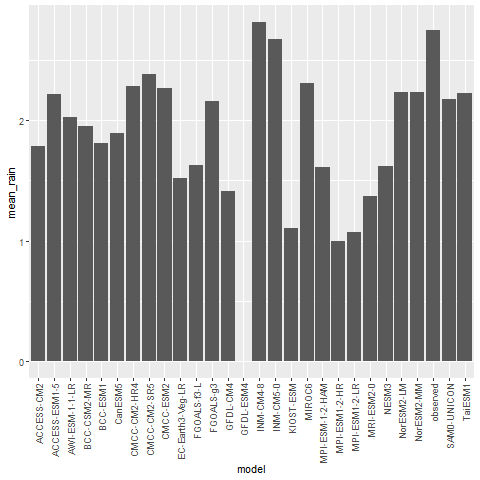

CPU times: total: 5.45 s
Wall time: 5.75 s


In [10]:
%%time
%%R
names(df_ae_final) <- make.names(names(df_ae_final), unique=TRUE)
df_ae_final %>%
    group_by(model) %>%
    summarise(mean_rain = mean(rain..mm.day.)) %>%
    ggplot((aes(x=model,y=mean_rain))) +
        geom_bar(stat='identity')+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))            

In [11]:
%%time
%%R
str(df_ae_final)

tibble [62,513,863 x 7] (S3: tbl_df/tbl/data.frame)
 $ time         : POSIXct[1:62513863], format: "1889-01-01 04:00:00" "1889-01-02 04:00:00" ...
 $ lat_min      : num [1:62513863] -36.2 -36.2 -36.2 -36.2 -36.2 ...
 $ lat_max      : num [1:62513863] -35 -35 -35 -35 -35 -35 -35 -35 -35 -35 ...
 $ lon_min      : num [1:62513863] 141 141 141 141 141 ...
 $ lon_max      : num [1:62513863] 142 142 142 142 142 ...
 $ rain..mm.day.: num [1:62513863] 3.29e-13 0.00 0.00 0.00 1.05e-02 ...
 $ model        : chr [1:62513863] "ACCESS-CM2" "ACCESS-CM2" "ACCESS-CM2" "ACCESS-CM2" ...
CPU times: total: 141 ms
Wall time: 116 ms


| Team Member | Operating System | RAM | Processor | Is SSD | Time taken(load chart 1) | Time taken(str)|
|:-----------:|:----------------:|:---:|:---------:|:---:|:---:|:---:|
| Affrin Sultana    |   Windows 10 Pro   | 16GB    |    AMD Ryzen 9 5000Series    |   Y    |         | |
| Helin Wang  | Windows 10 Education | 16GB | Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz 1.80 GHz  |  Yes   | 5.45s | 141ms |
| Manju Abhinandana Kumar    |      MacBook Air (M1, 2020)|  8 GB   |     Apple M1      |   Yes     |       | |
| Yair Guterman    |    macOS Big Sur    |  8 GB   |    1.8 GHz Dual-Core Intel Core i5       |    Yes    | 2min 45s  |986 ms |